## Kody


In [1]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
from IPython.display import Image, HTML, display

In [2]:
def ARC(t, z, m_1, m_2, b_1, b_2, c_1, c_2):
    x, y = z

    dx_dt = -m_1 * x + b_1 + c_1 * np.arctan(y)
    dy_dt = -m_2 * y + b_2 + c_2 * np.arctan(x)

    return [dx_dt, dy_dt]

In [3]:
def rozw_ARC(x_0, y_0, m_1, m_2, b_1, b_2, c_1, c_2, n=-1, ax=None, xlabel="x(t)", ylabel="y(t)", sizes=(-10, 10),
):
    x0, y0 = x_0, y_0
    initial_conditions = [x0, y0]

    t_span = (0, 5)
    t_eval = np.linspace(0, 5, 200)

    solution = solve_ivp(
        ARC,
        t_span,
        initial_conditions,
        args=(m_1, m_2, b_1, b_2, c_1, c_2),
        t_eval=t_eval,
    )

    if ax is None:
        ax = plt.gca()

    ax.plot(solution.t, solution.y[0], label=xlabel, color="olivedrab")
    ax.plot(solution.t, solution.y[1], label=ylabel, color="hotpink")
    ax.set_ylim(sizes[0], sizes[1])
    ax.set_xlabel("Czas t")
    ax.set_ylabel("Wartości")
    ax.legend()
    ax.grid()
    if n >= 0:
        ax.set_title(f"Wyk {n} \n Stan emocjonalny aktorów w czasie")
    else:
        ax.set_title(f"Stan emocjonalny aktorów w czasie")

## Model Foryś-Górecka-Piotrowska

Niech $x(t)$, $y(t)$ wyrażają stan emocjonalny odpowiedniego akto‐
ra w czasie t. Proponujemy następujący układ równań różcznikowych:

$$
\begin{aligned}
\begin{array}{l}
dx/dt = -m_1 x(t) + b_1 + c_1 f_1(y(t)), \\
dy/dt= -m_2 y(t) + b_2 + c_2 f_2(x(t)).
\end{array}
\end{aligned}
\quad \text{(1)}
$$

Współczynniki $m_i$ oznaczają <b>tempo zmiany nastroju aktora $i$ "w samotności"</b> i $m_i > 0$.

$f_i$ <b>jest funkcją wpływu nastroju aktora $j$ na aktora $i$</b>. Na potrzeby naszego projektu, przy generowaniu wykresów za funkcję wpływu przyjmujemy $\arctan(x)$.

Współczynnik $c_i$ oznacza <b>natężenie i kierunek funkcji wpływu</b>. Jeśli $c_i$ jest dodatnie, to aktor ma pozytywne nastawienie do rozmówcy, a jeśli ujemne, to negatywne.

Wpółczynnik $b_i$ opisuje <b>ogólną postawę aktora</b>: dla wartości dodatnich &mdash; optymistyczną, a dla ujemnych &mdash; pesymistyczną. W przypadku badania modelu relacji Rodzic-Dziecko będziemy nazywać tą postawę "emocjonalnością" aktora.

## Wykres Interaktywny

In [4]:
interactive_plot = interactive(
    rozw_ARC,
    x_0=(-5.0, 5.0, 0.1),
    y_0=(-5.0, 5.0, 0.1),
    m_1=(0.0, 5.0, 0.1),
    m_2=(0.0, 5.0, 0.1),
    b_1=(-5.0, 5.0, 0.1),
    b_2=(-2.0, 2.0, 0.1),
    c_1=(-5.0, 5.0, 0.1),
    c_2=(-5.0, 5.0, 0.1),
    n=fixed(-1),
    ax=fixed(None),
    xlabel=fixed("x(t)"),
    ylabel=fixed("y(t)"),
    sizes=fixed((-6, 6)),
)
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x_0', max=5.0, min=-5.0), FloatSlider(value=0.0, des…

## Syndrom Sztokholmski


Sprawdźmy działanie modelu w konkretnych przypadkach. Wyobraźmy sobie sytuację, w której mamy ofiarę $x$ i oprawcę $y$, np. porwanie. W takiej sytuacji możemy przypuszczać, że początkowy stan emocjonalny obu aktorów będzie negatywny ($<0$) i stan ofiary będzie niższy od stanu oprawcy. Przyjmujemy zatem $x_0 = -4.5$ i $y_0 = -2$. Ogólna postawa aktorów nie ma dla nas znaczenia w tej konkretnej sytuacji, stąd $b_1 = b_2 = 0$. Współczynniki $m_1, m_2$ będą przyjmować wartośc $2$ &mdash; przeciętną dla tego parametru.

W obrazowaniu tej sytuacji najbardziej interesuje nas jakie nastawienie do oprawcy ma ofiara. Syndrom sztokholmski polega na odczuwaniu sympatii przez ofiarę do oprawcy, zobaczymy jak różni się zmiana stanu emocjonalnego aktora przy zmianie $c_1$ z $-5$ na $5$. Ustalmy $c_2 = -2$.

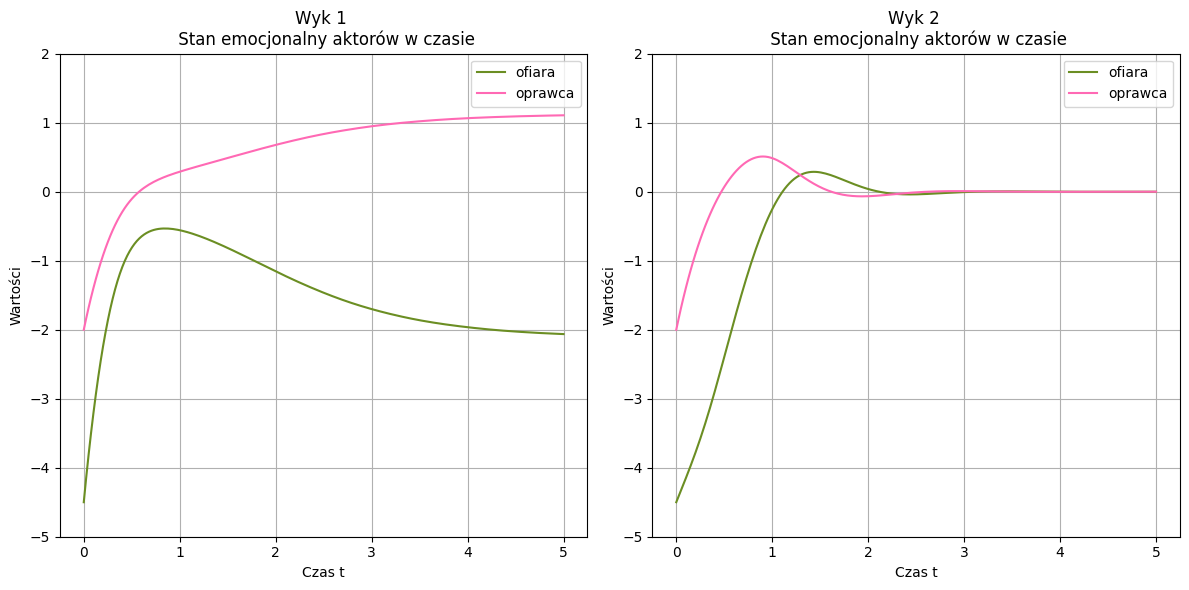

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

rozw_ARC(-4.5, -2, 2, 2, 0, 0, -5, -2, n = 1, ax=axes[0], xlabel="ofiara", ylabel="oprawca", sizes=(-5, 2),
)
rozw_ARC(-4.5, -2, 2, 2, 0, 0, 5, -2, n = 2, ax=axes[1], xlabel="ofiara", ylabel="oprawca", sizes=(-5, 2),
)

plt.tight_layout()
plt.show()

Porównujemy zmianę stanu emocjonalnego ofiary i oprawcy na wykresach 1 i 2. Możemy zaobserwować, że wyższy współczynnik $c_1$ skutkuje lepszym stanem emocjonalny ofary [Wyk 2]. Dodatkowo jego oprawca dąży do stanu apatii. Ta sytuacja stwarza większe poczucie bezpieczeństwa, co pokrywa się z teorią.

### animacja

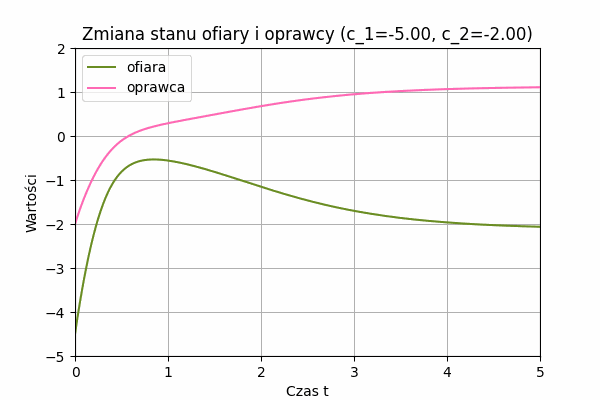

In [6]:
Image("sztokholm_animacja.gif")

## Relacja Rodzic-Dziecko


Kolejną rozważaną przez nas sytuacją będzie relacja rodzica $x$ z dzieckiem $y$. Przyjmujemy neutralny początkowy stan emocjonalny $x_0 = y_0 = 2$ i $m_1 = m_2 = 2$ jak w poprzednim przypadku. W tym modelu nastawienie aktorów do siebie jest wysoko pozytywne $c_1 = 4$, $c_2 = 5$ &mdash; ze względu na naturę dziecka, współczynnik jest wyższy niż u rodzica.

W tej sytuacji interesuje nas emocjonalność rodzica, czyli podejście do życia. Zbadamy jak zmienia się stan emocjonalny aktorów, przy zmianie współczynnika $b_1$ z $5$ (pozytywna emocjonalność) na $-5$ (negatywna emocjonalność). Ustalmy, że dziecko nie ma jeszcze wyrobionej emocjonalności, więc $b_2 = 0$.

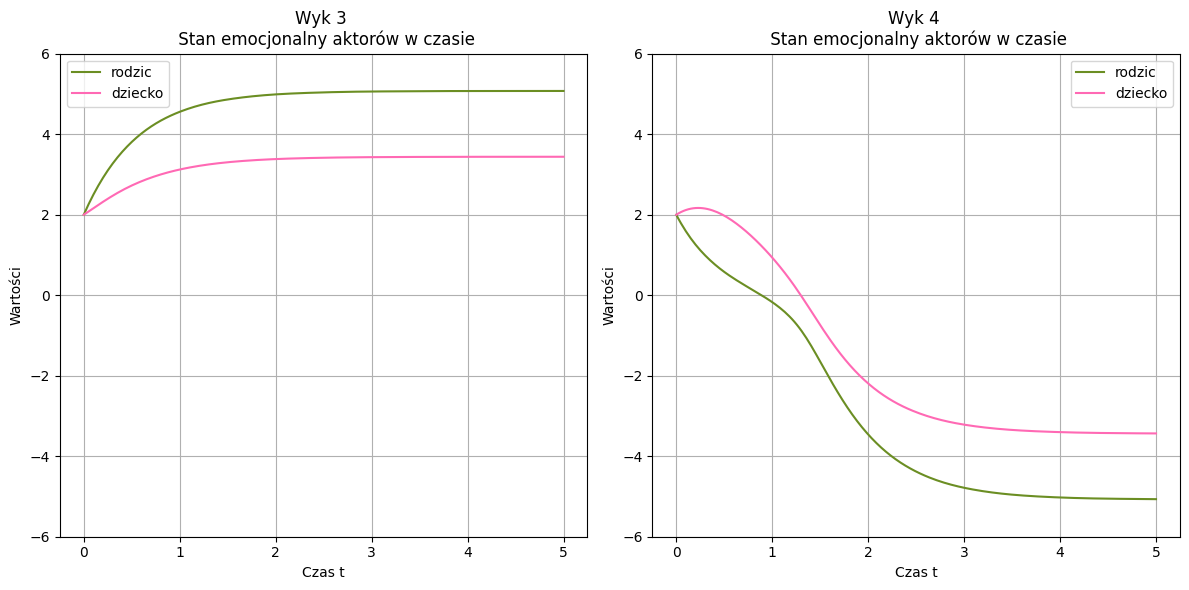

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

rozw_ARC(
    2, 2, 2, 2, 5, 0, 4, 5, n = 3, ax=axes[0], xlabel="rodzic", ylabel="dziecko", sizes=(-6, 6)
)
rozw_ARC(2, 2, 2, 2, -5, 0, 4, 5, n = 4, ax=axes[1], xlabel="rodzic", ylabel="dziecko", sizes=(-6, 6),
)

plt.tight_layout()
plt.show()

Porównujemy zmianę stanu emocjonalnego rodzica i dziecka na wykresach 3 i 4. Widzimy jak zmiana postawy rodzica z wysoko optymistycznej [Rys 3] na wysoko pesymistyczną [Rys 4], wpłynęła na silne obniżenie się stanu
emocjonalnego dziecka z wartości ok. 3 do ok. ‐4. Tak intensywna zmiana humoru może skutkować płaczem i narzekaniami u dziecka, co zgadza się z badaniami.

### animacja

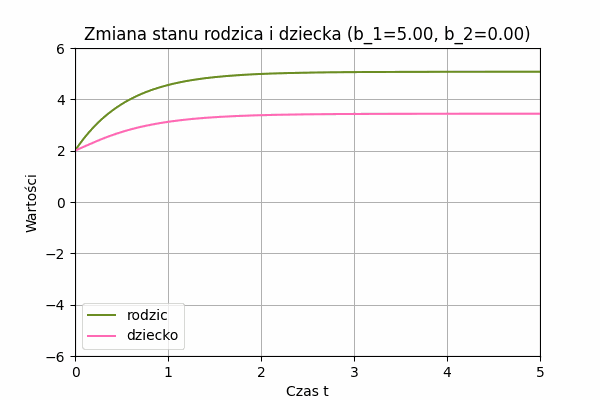

In [8]:
Image("rodzic_dziecko_animacja.gif")